<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercicio 1</h5>
        <p>Grupo: 4<p>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

import warnings
warnings.filterwarnings('ignore')

Leemos los datos a trabajar


In [2]:
data = pd.read_csv("D:/ACER/MCD_2023/AST_G4/dataset/eth.csv")

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.index = data['Date']
del data['Date']

In [4]:
data=data.asfreq('d')
data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,0.00K,4.91%
2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05%


In [76]:
# Filtra las filas para que solo muestre las del año 2023
data_23 = data['2023-01-20':'2023-11-05']

In [77]:
data_23 = data_23[['Price']]

In [78]:
data_23.rename({'Price': 'ETH'}, axis=1,inplace=True)

In [79]:
data_23.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2023-01-20 to 2023-11-05
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ETH     290 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [80]:
# La columna precio es del tipo object por esta razón: '1,014.7'. Entonces, se debe reemplazar las ',' por ' '
data_23['ETH'] = data_23['ETH'].str.replace(',', '').astype(float)

data_23.describe()

,ETH
count,290.000000
mean,1752.890586
std,133.131252
min,1426.750000
25%,1637.952500
50%,1782.210000
75%,1861.657500
max,2119.290000


Text(0.5, 1.0, 'Histograma de la Serie')

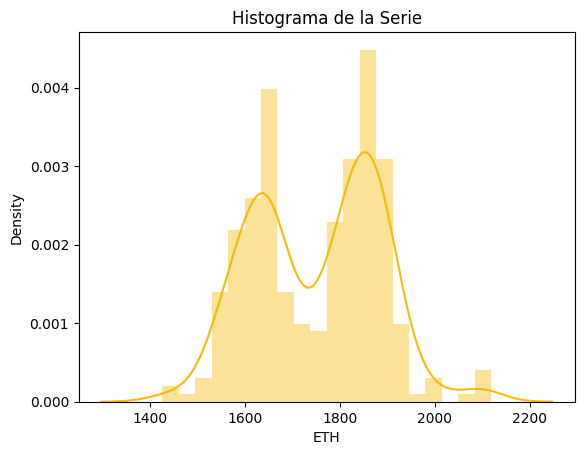

In [81]:
sns.distplot(data_23.ETH,bins=20,color='#fcba03')
plt.title('Histograma de la Serie')

In [13]:
import scipy.stats
import pylab

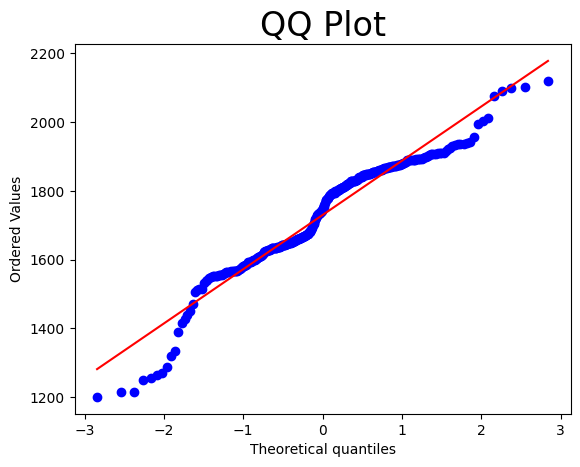

In [14]:
scipy.stats.probplot(data_23.ETH, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

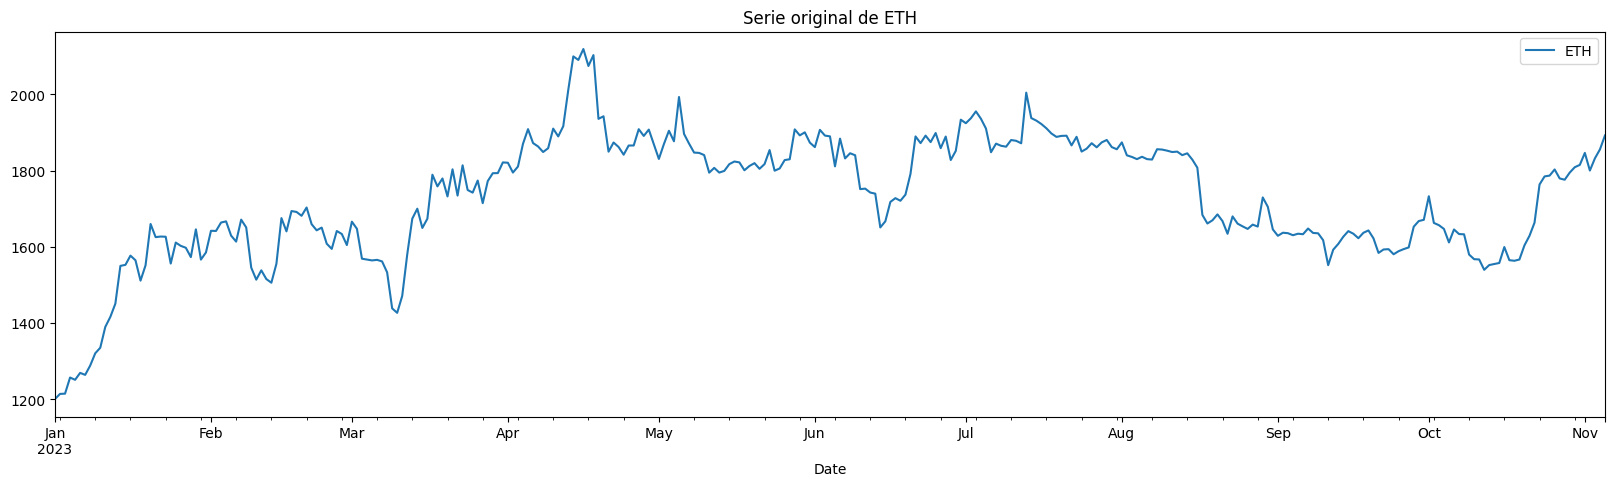

In [15]:
data_23.plot(figsize=(20,5), title = "Serie original de ETH")
plt.show()

In [19]:
data_diff=data_23.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)
data_diff.drop(['2023-01-01	'], inplace=True) # se elimina la última fecha al aplicar la primera diferencia

In [20]:
data_diff.head()

,ETH
Date,
2023-01-02,13.41
2023-01-03,0.64
2023-01-04,42.35
2023-01-05,-5.97
2023-01-06,18.19


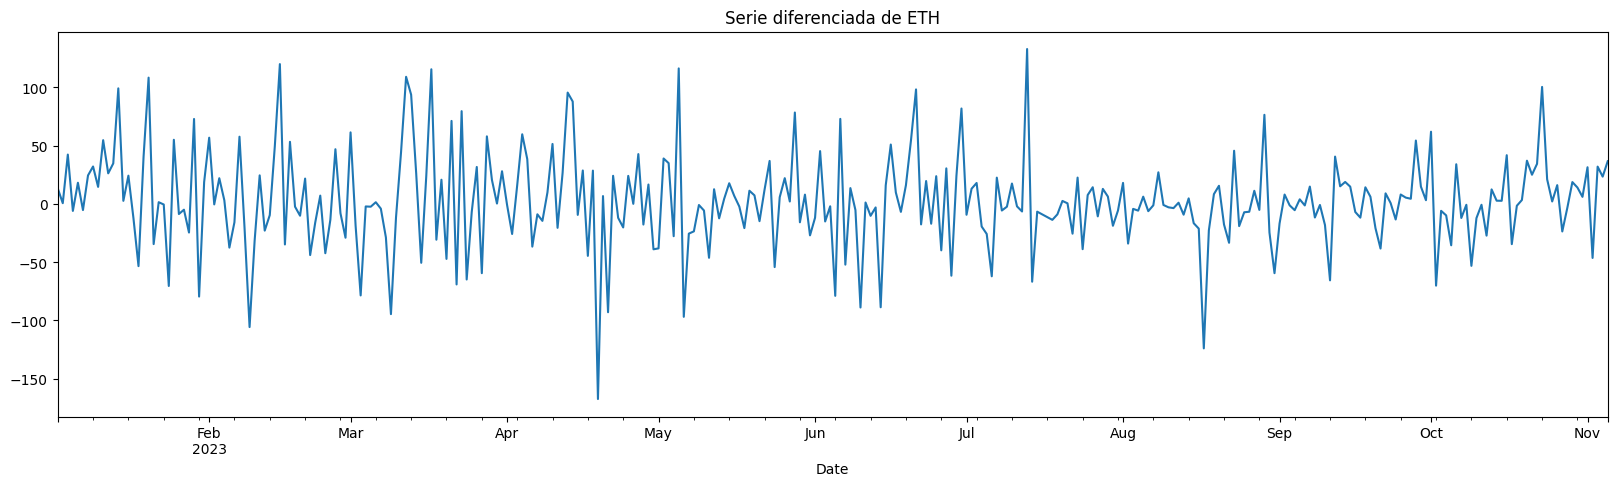

In [21]:
data_diff.ETH.plot(figsize=(20,5), title = "Serie diferenciada de ETH")
plt.show()

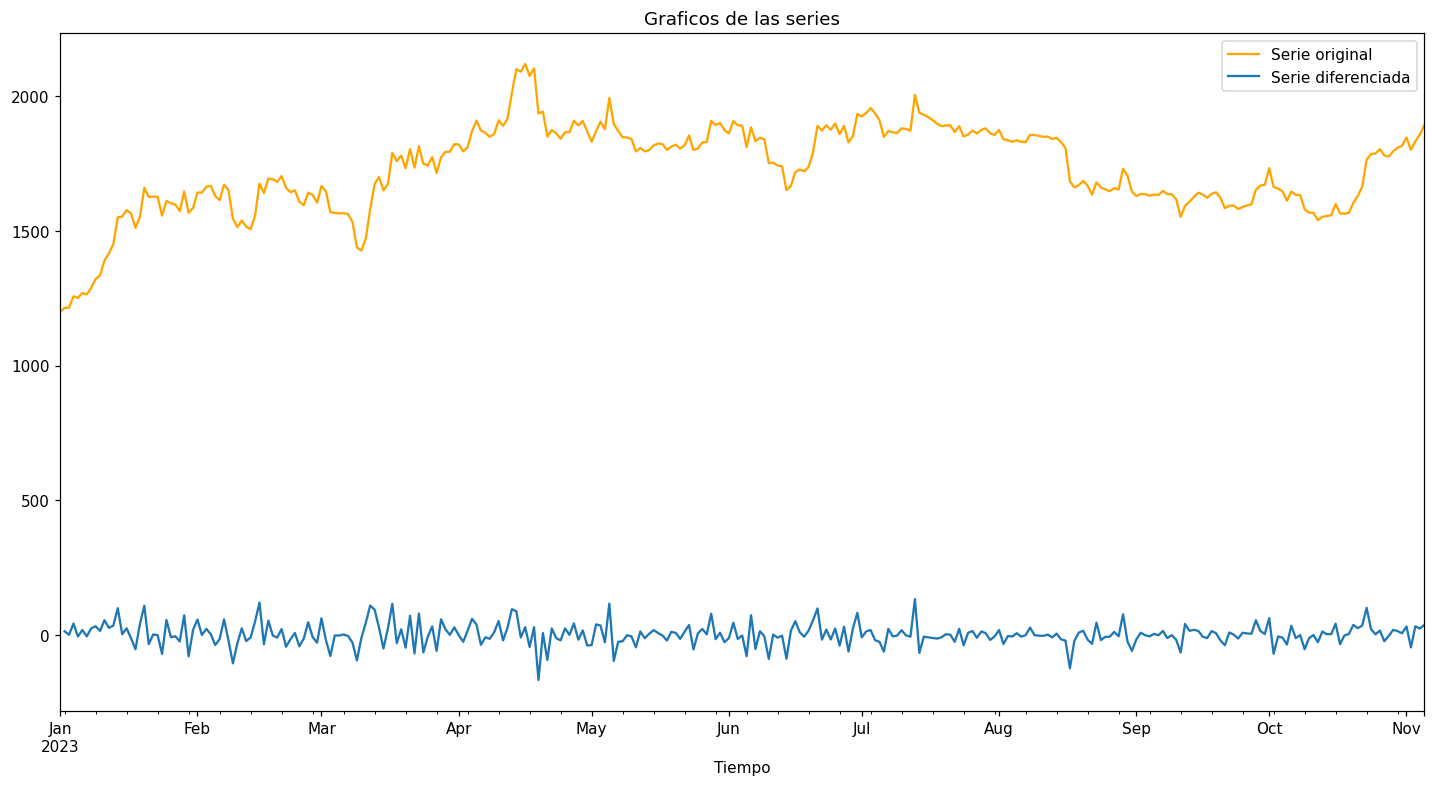

In [22]:
plt.figure(figsize=(16, 8), dpi=110)

data_23['ETH'].plot(label='Serie original', color='orange')
data_diff['ETH'].plot(label='Serie diferenciada')

plt.title('Graficos de las series')

plt.xlabel('Tiempo')

plt.legend()

# Graficos serie original

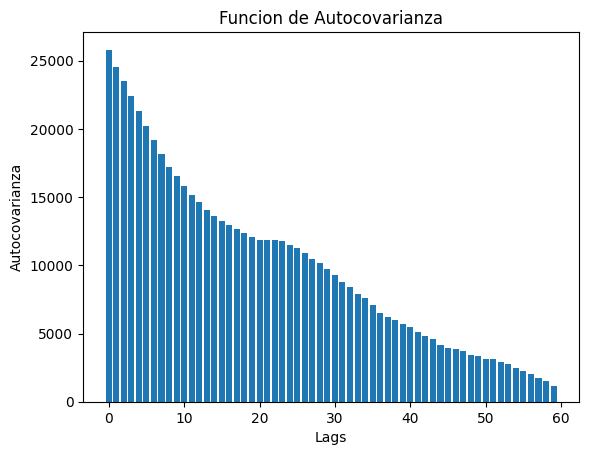

In [33]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_23.ETH

# Calcular autocovarianza para 30 retrasos (lags)
lags = range(60)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars)
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza')
plt.show()

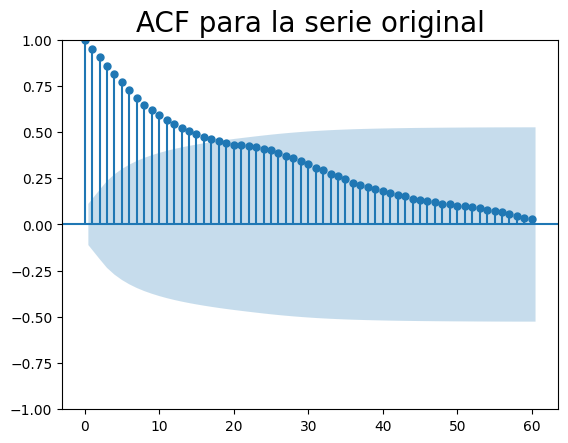

In [34]:
sgt.plot_acf(data_23.ETH, zero = True, lags = 60)
plt.title("ACF para la serie original", size = 20)
plt.show()

*COMENTARIO NUEVO 1*

Una vez mas, vemos la grafica de la funcion de autocorrelacion que muestra cómo las observaciones en una serie de datos se relacionan entre sí a medida que se desplazan en el tiempo. Ayuda a identificar patrones de repetición en los datos.La relacion en cada momento es directa e indirecta con respecto al momento 0.
Con esta grafica, podemos llegar a tener una primera aproximacion de presencia o no de estacionariedad.

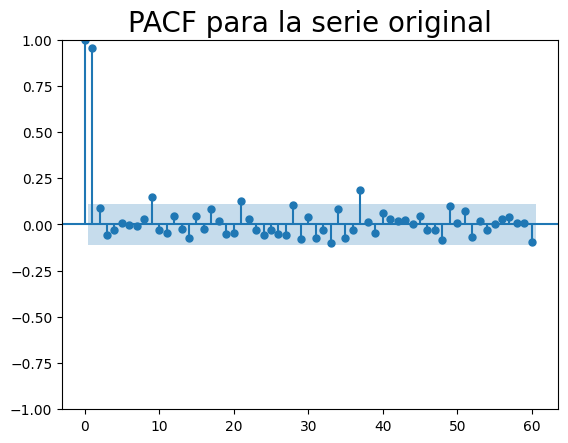

In [35]:
sgt.plot_pacf(data_23.ETH, lags = 60, alpha = 0.05,  method = ('ols'))
plt.title("PACF para la serie original", size = 20)
plt.show()

*COMENTARIO NUEVO 2*

En este caso, la grafica es de una funcion de autocorrelacion parcial ( PACF = "Partial Autocorrelation Function ). La misma ayuda a identificar relaciones directas entre observaciones separadas en el tiempo, eliminando efectos indirectos. Cuando estamos trabajando con modelos autoregresivos, nos puede mostrar el orden del mismo.

# Graficos serie original diferenciada

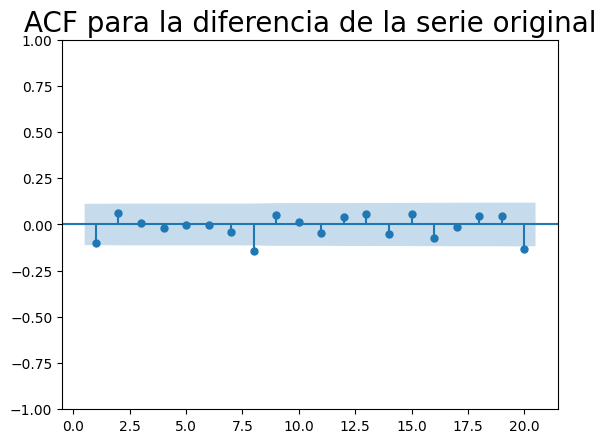

In [45]:
sgt.plot_acf(data_diff.ETH, zero = False, lags = 20)
plt.title("ACF para la diferencia de la serie original", size = 20)
plt.show()

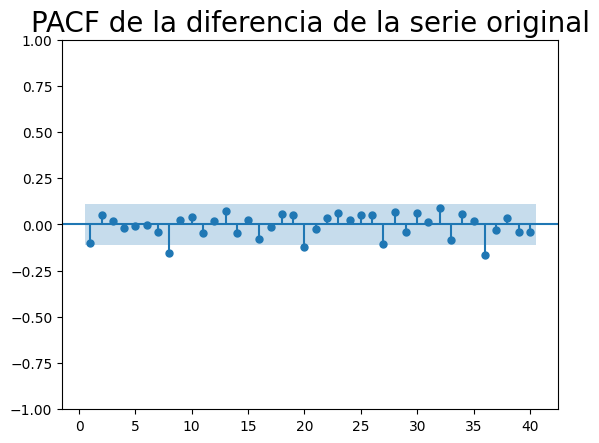

In [46]:
sgt.plot_pacf(data_diff.ETH, lags = 40, alpha = 0.05, zero = False)
plt.title("PACF de la diferencia de la serie original", size = 20)
plt.show()

# Modelo Autorregresivo de orden 1

In [47]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [66]:
model = sm.tsa.arima.ARIMA(data_23.ETH, order=((2),0,0))
result = model.fit()

In [67]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ETH   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1581.593
Date:                Tue, 07 Nov 2023   AIC                           3171.186
Time:                        12:16:43   BIC                           3186.119
Sample:                    01-01-2023   HQIC                          3177.156
                         - 11-05-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.6804    103.605     16.106      0.000    1465.618    1871.743
ar.L1          0.8988      0.054     16.626      0.000       0.793       1.005
ar.L2          0.0858      0.056      1.533      0.125      -0.024       0.195
sigma2      1616.4334     94.885     17.036      0.000    1430.463    1802.404
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                49.03
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
result.arroots

array([  1.01439154, -11.49391572])

In [70]:
print(f"La raiz REAL del modelo condicionado a un AR(2) son = {result.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

La raiz REAL del modelo condicionado a un AR(2) son = [  1.01439154 -11.49391572] 
 vemos que es en modulo mayor a 1. Es decir, es estacionaria 


In [71]:
print(f"Los parametros que arroja el modelo son= \n {result.params} ")

Los parametros que arroja el modelo son= 
 const     1668.680440
ar.L1        0.898810
ar.L2        0.085768
sigma2    1616.433410
dtype: float64 


In [72]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {result.aic} \n -Bayesiano= {result.bic} \n -Hannan-Quinn {result.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 3171.1856708386076 
 -Bayesiano= 3186.1190359461984 
 -Hannan-Quinn 3177.1560586838536


Presentacion de los residuos del modelo

In [73]:
print(f" La media de los residuos del modelo es=  {result.resid.mean()}")

 La media de los residuos del modelo es=  1.835357768672239


In [74]:
print(f" La varianza de los residuos del modelo es=  {result.resid.var()}")

 La varianza de los residuos del modelo es=  2306.1948812875494


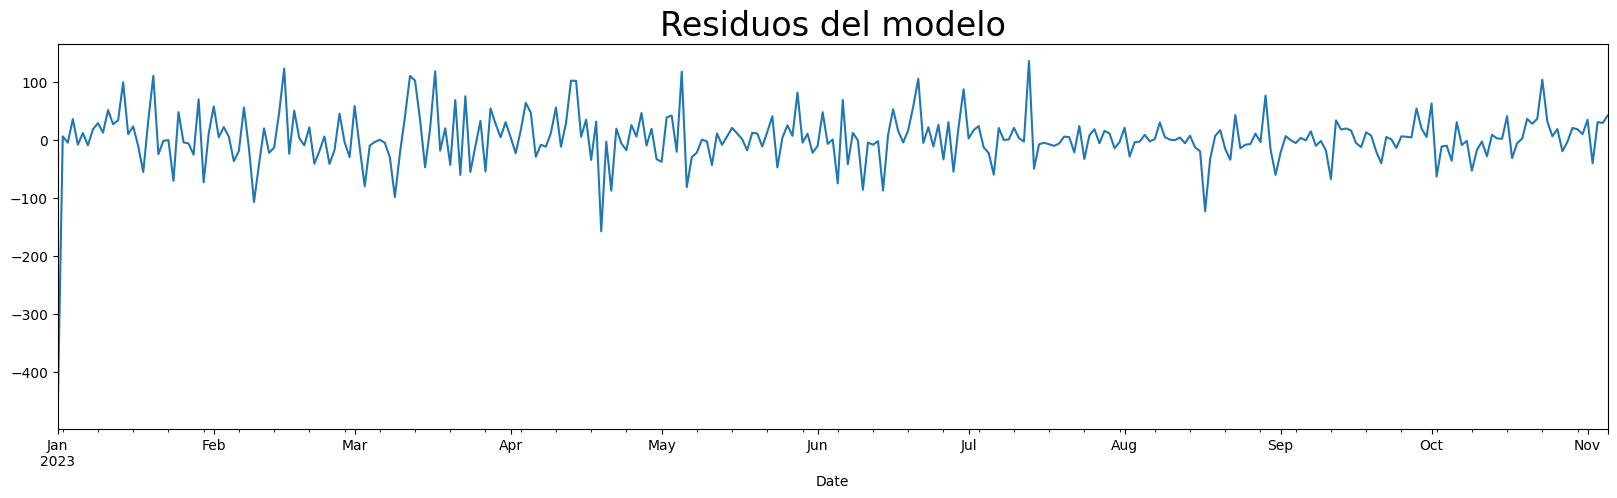

In [75]:
result.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

*COMENTARIO NUEVO 3*

En el gráfico, se presentan los residuos del modelo. Para validar la elección adecuada del modelo, es fundamental que los resultados de estos residuos cumplan con la propiedad de "ruido blanco". Es recomendable enfatizar este concepto y aclarar cualquier pregunta o inquietud que puedan surgir al respecto. Estoy a disposición para responder cualquier consulta sin ningún problema.

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

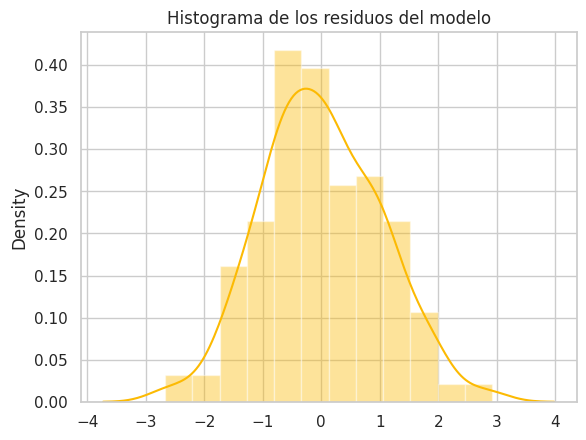

In [ ]:
sns.distplot(result.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

In [ ]:
import scipy.stats
import pylab

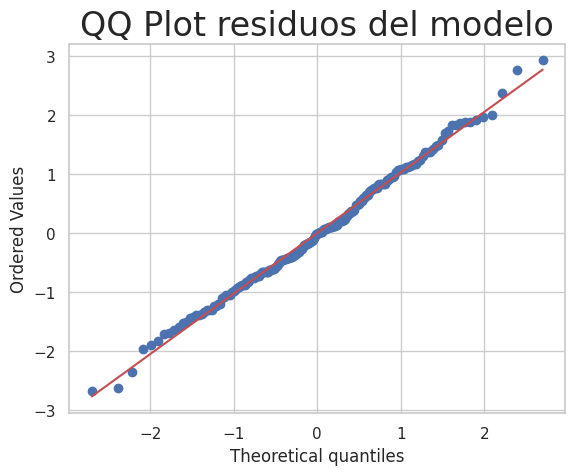

In [ ]:
scipy.stats.probplot(result.resid, plot = pylab)
plt.title("QQ Plot residuos del modelo", size = 24)
pylab.show()

*Prueba* Ljung-Box

In [ ]:
import statsmodels.api as sm

In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(result.resid, lags=30)

In [ ]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.080034,0.777251
2,0.434094,0.804892
3,0.897758,0.825969
4,4.085922,0.394502
5,4.096859,0.535557
6,4.114261,0.661217
7,4.659609,0.701422
8,5.120726,0.744598
9,6.622665,0.676339
10,6.875453,0.737148


Text(0, 0.5, 'P-valores ')

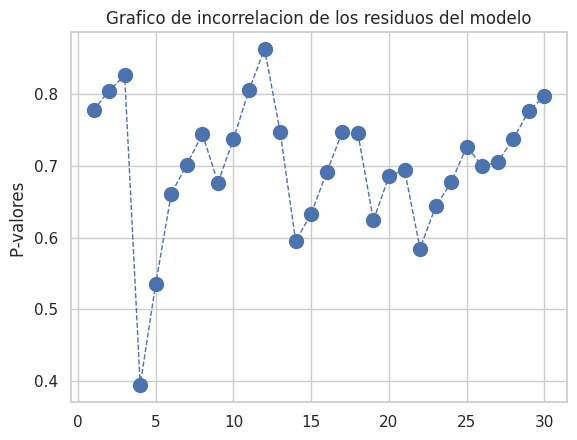

In [ ]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo")
plt.ylabel("P-valores ")

*COMENTARIO NUEVO 4*

Aqui vemos la grafica de incorrelacion de los residuos del modelo, los residuos tienen q estar incorrelacionados. Tienen q ser proxi al ruido blanco. Una forma de analisis es esta grafica para ver esto. En este caso, los residuos no presentan correlacion.